# Clustering Crypto

In [18]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Deliverable 1: Preprocessing the Data for PCA

In [2]:
# Load the crypto_data.csv dataset.
file_path = Path('crypto_data.csv')
crypto_df = pd.read_csv(file_path)
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
#Drop rows where IsTrading is false
crypto_df = crypto_df.loc[crypto_df.IsTrading, :]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
#Drop the IsTrading Column
crypto_df = crypto_df.drop(columns=['IsTrading'])
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
#Drop all rows that have an "NaN" value (at least one null value)
crypto_df = crypto_df.dropna()
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter the crypto_df DataFrame so it only has rows where coins have been mined.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Create a new DataFrame that holds only the cryptocurrency names, and use the crypto_df DataFrame index as the index for this new DataFrame.
df_name = crypto_df[['Unnamed: 0','CoinName']].copy()
df_name = df_name.set_index('Unnamed: 0')
df_name.index.name = None
df_name

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [9]:
# Remove the CoinName column from the crypto_df DataFrame since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.set_index('Unnamed: 0')
crypto_df.index.name = None
crypto_df = crypto_df.drop(columns=['CoinName'])
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [10]:
# # Use get_dummies() to create variables for text features.
cryptod_df = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
cryptod_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize the data with StandardScaler().
cryptods_df = StandardScaler().fit_transform(cryptod_df)
print(cryptods_df)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


### Deliverable 2: Reducing Data Dimensions Using PCA

In [12]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(cryptods_df)

In [22]:
# Create a DataFrame with the three principal components.
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"]
)
df_crypto_pca.head()

,PC1,PC2,PC3
0,-0.353475,1.011417,-0.565570
1,-0.336786,1.011483,-0.565921
2,2.333438,1.680526,-0.593067
3,-0.145398,-1.295438,0.165658
4,-0.142986,-2.003024,0.357500


In [23]:
# df_crypto_pca.set_index('Unnamed: 0')
# df_crypto_pca.index.name = None
# df_crypto_pca
pcs_df = pd.DataFrame(index=cryptod_df.index,  data=crypto_pca, columns=["PC1", "PC2", "PC3"])
pcs_df.head(10)

,PC1,PC2,PC3
42,-0.353475,1.011417,-0.565570
404,-0.336786,1.011483,-0.565921
1337,2.333438,1.680526,-0.593067
BTC,-0.145398,-1.295438,0.165658
ETH,-0.142986,-2.003024,0.357500
LTC,-0.187105,-1.153356,-0.045933
DASH,-0.378476,1.231039,-0.484200
XMR,-0.127878,-2.175521,0.435815
ETC,-0.141425,-2.003135,0.357478
ZEC,-0.112938,-1.928127,0.396995


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\z0029b0\Anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


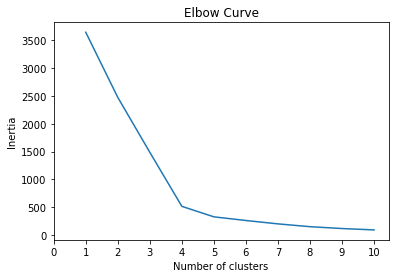

In [24]:
# Create an elbow curve to find the best value for K.
# YOUR CODE HERE
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Running K-Means with `k=4`

In [27]:
# Initialize the K-Means model.

model = KMeans(n_clusters=4, random_state=5)
model

# Fit the model
# YOUR CODE HERE
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
print(predictions)

[0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0
 1 1 0 1 1 1 1 0 3 3 1 1 1 0 3 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 3 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 

In [35]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df, pcs_df], axis=1)


#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df['CoinName'] = df_name['CoinName']


#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# YOUR CODE HERE
clustered_df['Class'] = predictions

# # Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.353475,1.011417,-0.565570,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.336786,1.011483,-0.565921,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.333438,1.680526,-0.593067,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.145398,-1.295438,0.165658,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.142986,-2.003024,0.357500,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.187105,-1.153356,-0.045933,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.378476,1.231039,-0.484200,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.127878,-2.175521,0.435815,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.141425,-2.003135,0.357478,Ethereum Classic,1
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.112938,-1.928127,0.396995,ZCash,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [54]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2",
    z="PC3",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    color="Class",
    symbol="Class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#Using HV Plot
# clustered_df.hvplot.scatter(
#     x="TotalCoinsMined", y="TotalCoinSupply", hover_cols=["CoinName"], by="Class")


In [42]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], sortable=True, selectable=True)


:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [59]:
# Print the total number of tradable cryptocurrencies.
clustered_df.shape

(532, 9)

In [62]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE
Clustered_scaled = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply','TotalCoinsMined']])
Clustered_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [66]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(Clustered_scaled, columns=["TotalCoinSupply", "TotalCoinsMined"], index=clustered_df.index)
plot_df

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName"] = clustered_df["CoinName"]
plot_df

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"] = clustered_df["Class"]
plot_df

# plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000e+00,42 Coin,0
404,5.320000e-04,1.065855e-03,404Coin,0
1337,3.141593e-01,2.957551e-02,EliteCoin,0
BTC,2.100000e-05,1.810842e-05,Bitcoin,1
ETH,0.000000e+00,1.087731e-04,Ethereum,1
...,...,...,...,...
ZEPH,2.000000e-03,2.020225e-03,ZEPHYR,0
GAP,2.500000e-04,1.508199e-05,Gapcoin,0
BDX,1.400223e-03,9.901351e-04,Beldex,1
ZEN,2.100000e-05,7.370282e-06,Horizen,1


In [67]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x="TotalCoinsMined", y="TotalCoinSupply", hover_cols=["CoinName"], by="Class")


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)